# 1. Importing the libraries and Read Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Red_WineDF = pd.read_csv('dataset/winequality-red.csv', sep=';')
White_WineDF = pd.read_csv('dataset/winequality-white.csv', sep=';')

Red_WineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
White_WineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 2. Discretization of Wine Quality

In [3]:
# Quality >=7 is good wine and <7 is bad wine
Red_WineDF['discrete_quality'] = Red_WineDF['quality'].apply(lambda x: 1 if x>=7 else 0)
White_WineDF['discrete_quality'] = White_WineDF['quality'].apply(lambda x: 1 if x>=7 else 0)

Red_WineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,discrete_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
# Combine both the dataset
Red_WineDF['type'] = 'red'
White_WineDF['type'] = 'white'

WineDF = pd.concat([Red_WineDF, White_WineDF], axis=0)
WineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,discrete_quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


In [5]:
# Balance all the dataset
def BalanceDataset(data):
    # Separate the good and bad wine
    good_wine = data[data['discrete_quality']==1]
    bad_wine = data[data['discrete_quality']==0]

    # Balance the dataset
    good_wine = good_wine.sample(bad_wine.shape[0], random_state=42, replace=True)
    # bad_wine = bad_wine.sample(good_wine.shape[0], random_state=42, replace=True)
    data = pd.concat([good_wine, bad_wine], axis=0)

    return data

Red_WineDF = BalanceDataset(Red_WineDF)
White_WineDF = BalanceDataset(White_WineDF)
WineDF = BalanceDataset(WineDF)
Red_WineDF['discrete_quality'].value_counts()

discrete_quality
1    1382
0    1382
Name: count, dtype: int64

# 3. Data Splitting

In [6]:
from sklearn.model_selection import train_test_split

def splitTrainTest(data):
    train, test = train_test_split(data, test_size=0.2, random_state=42)
    return train, test

def PearsonCorrelation(data):
    X = data.drop(['quality', 'discrete_quality', 'type'], axis=1)
    y = data['discrete_quality']
    # Pearson Correlation, see the correlation between each of all features and y and visualize

    from scipy.stats import pearsonr
    corr = []
    for col in X.columns:
        corr.append(pearsonr(X[col], y)[0])
    corr = pd.Series(corr, index=X.columns)
    corr.sort_values(ascending=False, inplace=True)

    return corr

def plotCorrelationMatrix(corr):
    plt.figure(figsize=(10, 10))
    sns.barplot(x=corr.values, y=corr.index)
    plt.title(f'Pearson Correlation')
    plt.xlabel('Correlation')
    plt.ylabel('Features')
    plt.show()

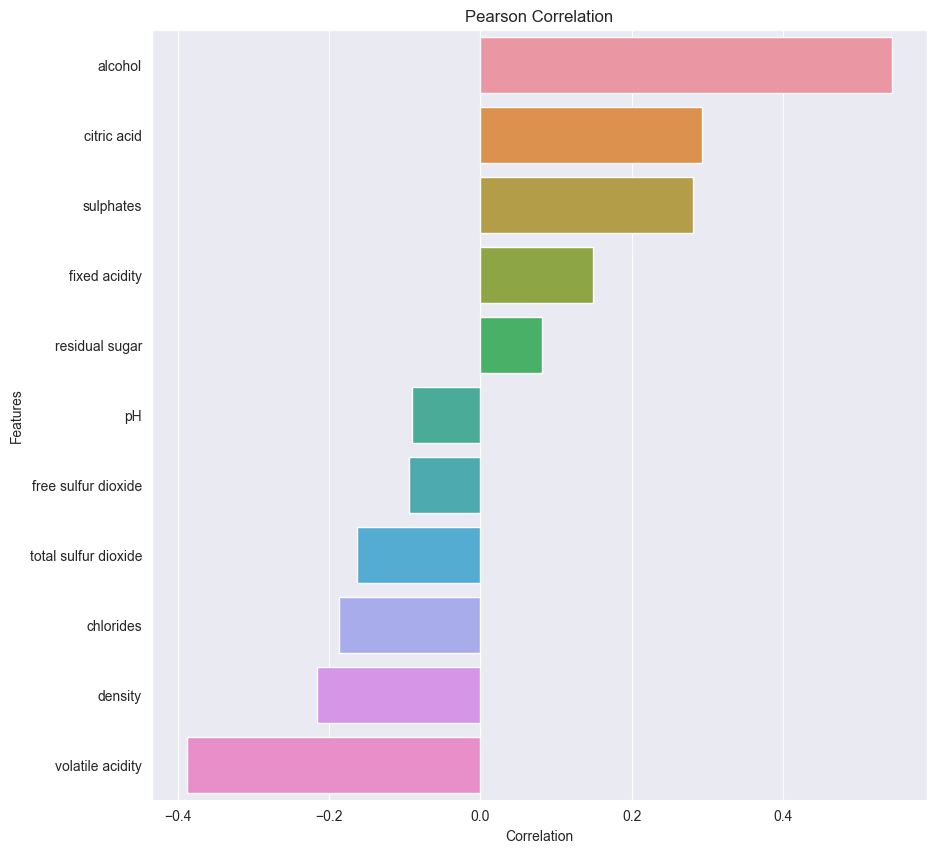

In [7]:
Red_Wine_Corr = PearsonCorrelation(Red_WineDF)
plotCorrelationMatrix(Red_Wine_Corr)

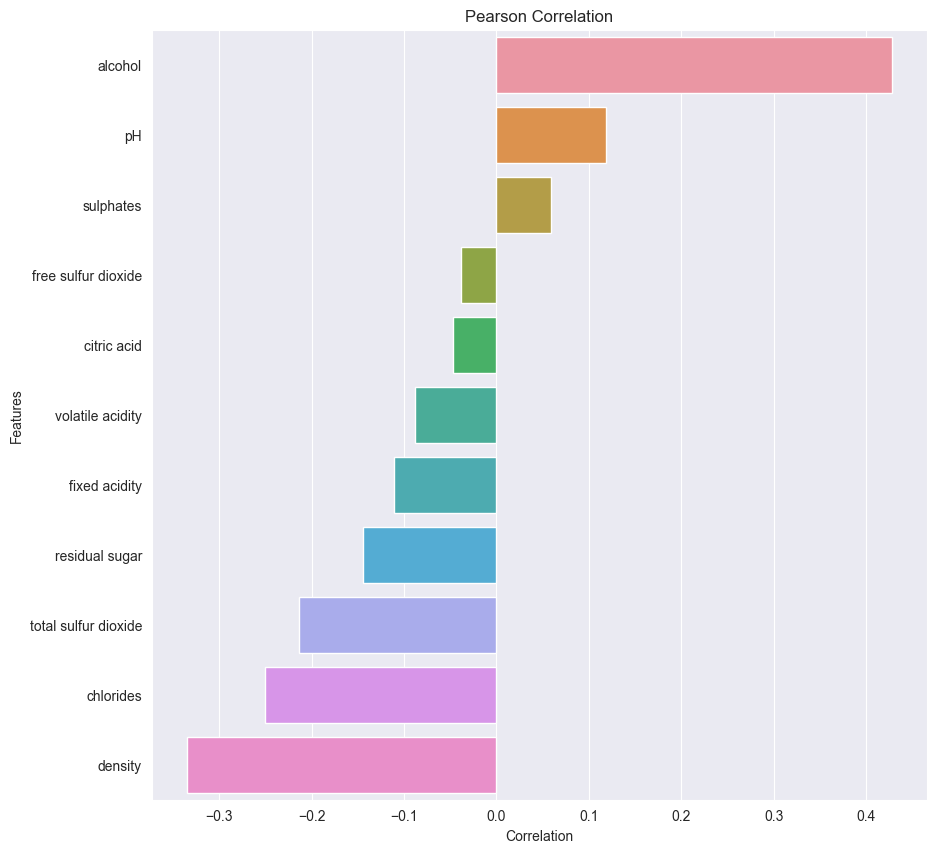

In [8]:
White_Wine_Corr = PearsonCorrelation(White_WineDF)
plotCorrelationMatrix(White_Wine_Corr)

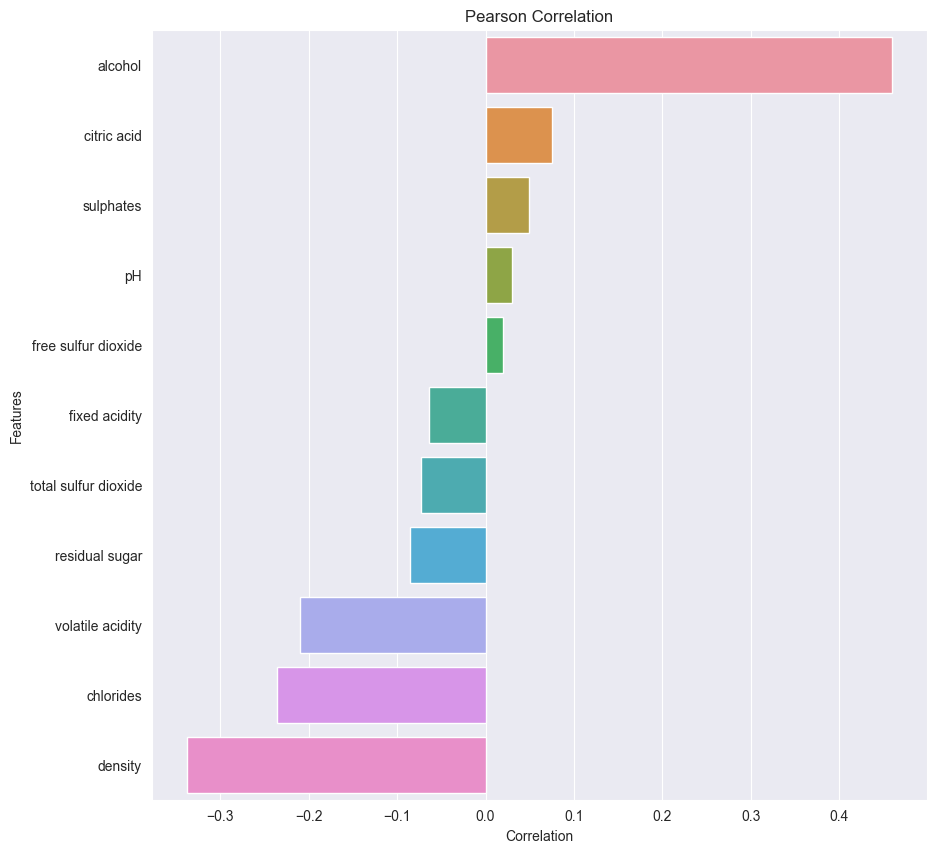

In [9]:
Wine_Corr = PearsonCorrelation(WineDF)
plotCorrelationMatrix(Wine_Corr)

In [10]:
from sklearn.preprocessing import StandardScaler

# Preprocess for Neural Network Model
def preprocessForNN(data):
    # Split the data into train and test
    train, test = splitTrainTest(data)
    Corr = PearsonCorrelation(data)
    # Separate the features and target
    X_train = train.drop(['quality', 'discrete_quality', 'type'], axis=1)
    X_train = X_train[Corr[Corr>0].index]
    y_train = train['discrete_quality']

    X_test = test.drop(['quality', 'discrete_quality', 'type'], axis=1)
    X_test = X_test[Corr[Corr>0].index]
    y_test = test['discrete_quality']

    # Normalize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, y_train, X_test, y_test


In [11]:
X_train, y_train, X_test, y_test = preprocessForNN(Red_WineDF)
X_train.shape[1], y_train.shape, X_test.shape, y_test.shape

(5, (2211,), (553, 5), (553,))

# 5. Model Building

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Define a function to compute F1 score

def BuildNNModel(X_train, y_train, X_test, y_test, epochs=100, batch_size=32, Optimizer='adam', Loss='binary_crossentropy'):
    inputtensor = Input(shape=(X_train.shape[1],))
    hidden1 = Dense(64, activation='relu')(inputtensor)
    hidden2 = Dense(32, activation='relu')(hidden1)
    hidden3 = Dense(16, activation='relu')(hidden2)
    output = Dense(1, activation='sigmoid')(hidden3)

    model = Model(inputs=inputtensor, outputs=output)
    model.compile(optimizer=Optimizer,
                  loss=Loss,
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           ])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    Evaluation_Metrics = model.evaluate(X_test, y_test)

    return model, history, Evaluation_Metrics


In [13]:
def PlotLoss(history):
    import matplotlib.pyplot as plt
    import pandas as pd

    pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
    plt.title(f'Loss vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.show()

    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
    plt.title(f'Accuracy vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.show()

    pd.DataFrame(history.history)[['precision', 'val_precision']].plot(figsize=(8, 5))
    plt.title(f'Precision vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Precision')

    plt.show()


    pd.DataFrame(history.history)[['recall', 'val_recall']].plot(figsize=(8, 5))
    plt.title(f'recall vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Recall')

    plt.show()



In [14]:

def printEvaluation(Evaluation_Metrics):
    print(f'Accuracy: {Evaluation_Metrics[1]}')
    print(f'Precision: {Evaluation_Metrics[2]}')
    print(f'Recall: {Evaluation_Metrics[3]}')


# 6. Pipeline for Neural Network Model

In [15]:
def pipelineForNN(data):
    # Preprocess the data
    X_train, y_train, X_test, y_test = preprocessForNN(data)
    # Build the model
    model, history, Evaluation_Metrics = BuildNNModel(X_train, y_train, X_test, y_test)
    # Visualize the model
    print(pd.DataFrame(history.history))
    PlotLoss(history)
    # Evaluate the model
    printEvaluation(Evaluation_Metrics)
    print('f1 score: ', 2*Evaluation_Metrics[2]*Evaluation_Metrics[3]/(Evaluation_Metrics[2]+Evaluation_Metrics[3]))


    return model

Epoch 1/100
192/192 [==============================] - 1s 3ms/step - loss: 0.5952 - accuracy: 0.7023 - precision: 0.6876 - recall: 0.7379 - val_loss: 0.5839 - val_accuracy: 0.7148 - val_precision: 0.7043 - val_recall: 0.7532
Epoch 2/100
192/192 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.7187 - precision: 0.7179 - recall: 0.7176 - val_loss: 0.5790 - val_accuracy: 0.7129 - val_precision: 0.7208 - val_recall: 0.7069
Epoch 3/100
192/192 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.7150 - precision: 0.7155 - recall: 0.7108 - val_loss: 0.5735 - val_accuracy: 0.7064 - val_precision: 0.7183 - val_recall: 0.6915
Epoch 4/100
192/192 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.7163 - precision: 0.7142 - recall: 0.7180 - val_loss: 0.5638 - val_accuracy: 0.7181 - val_precision: 0.7127 - val_recall: 0.7429
Epoch 5/100
192/192 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.7270

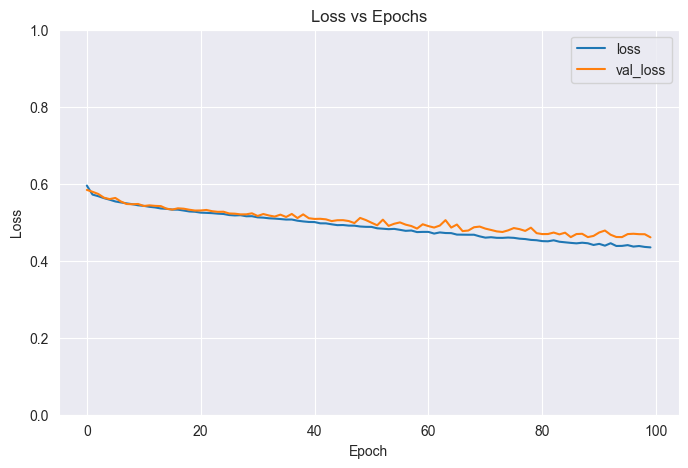

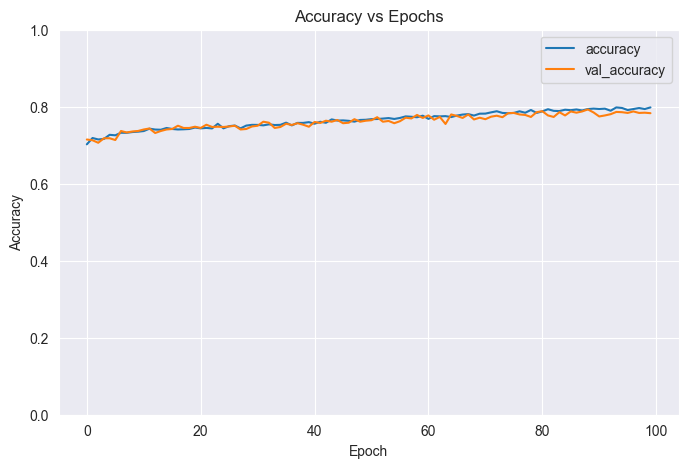

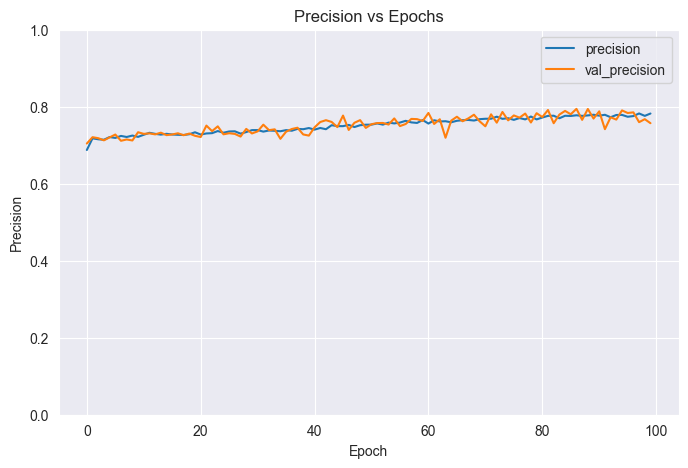

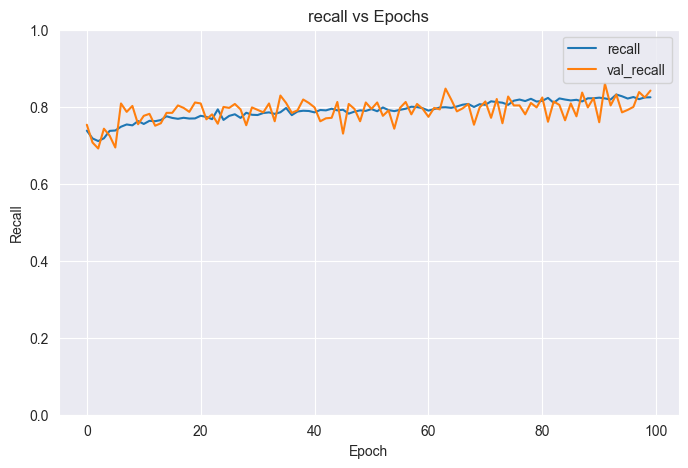

Accuracy: 0.783203125
Precision: 0.7572254538536072
Recall: 0.8419023156166077
f1 score:  0.7973219841643964


In [16]:
pipelineForNN(White_WineDF)

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 0.5923 - accuracy: 0.7160 - precision: 0.7739 - recall: 0.6047 - val_loss: 0.4552 - val_accuracy: 0.8282 - val_precision: 0.8247 - val_recall: 0.8451
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7919 - precision: 0.7884 - recall: 0.7942 - val_loss: 0.4253 - val_accuracy: 0.8210 - val_precision: 0.8114 - val_recall: 0.8486
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8037 - precision: 0.7964 - recall: 0.8124 - val_loss: 0.4005 - val_accuracy: 0.8228 - val_precision: 0.8100 - val_recall: 0.8556
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8055 - precision: 0.7961 - recall: 0.8179 - val_loss: 0.3874 - val_accuracy: 0.8427 - val_precision: 0.8251 - val_recall: 0.8803
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8100 - precisi

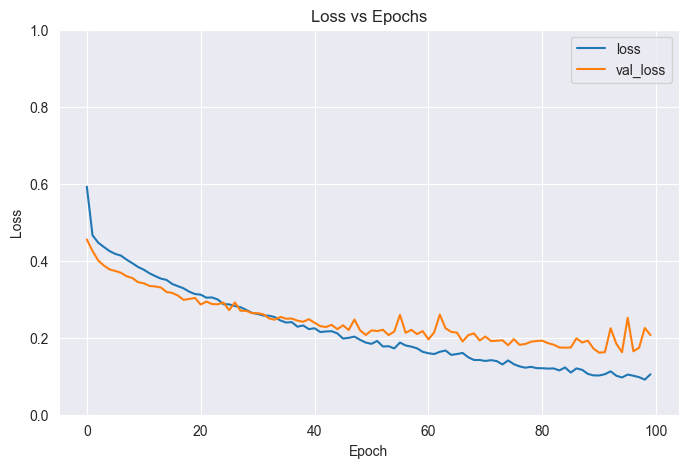

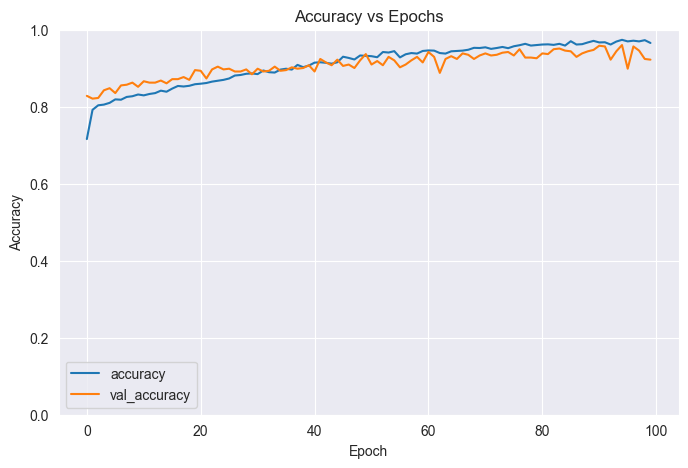

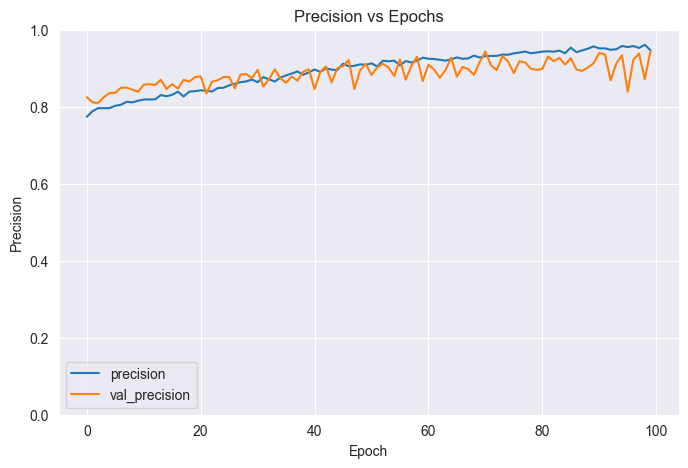

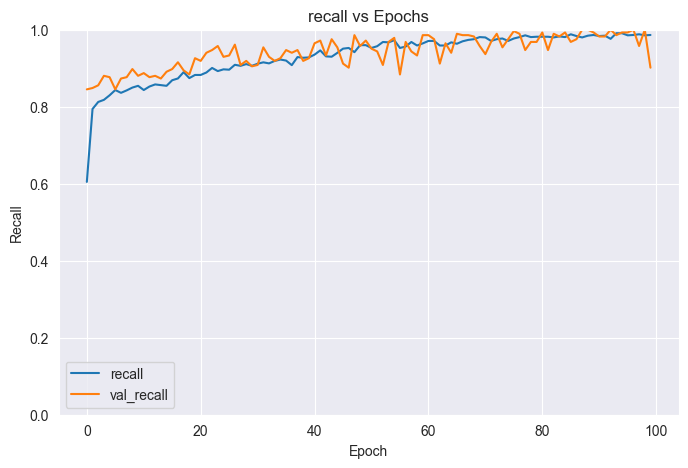

Accuracy: 0.9222423434257507
Precision: 0.9446494579315186
Recall: 0.9014084339141846
f1 score:  0.922522519183385


In [17]:
pipelineForNN(Red_WineDF)

Epoch 1/100
261/261 [==============================] - 1s 2ms/step - loss: 0.5804 - accuracy: 0.7102 - precision: 0.6901 - recall: 0.7591 - val_loss: 0.5486 - val_accuracy: 0.7318 - val_precision: 0.7211 - val_recall: 0.7700
Epoch 2/100
261/261 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7457 - precision: 0.7462 - recall: 0.7415 - val_loss: 0.5240 - val_accuracy: 0.7332 - val_precision: 0.7346 - val_recall: 0.7436
Epoch 3/100
261/261 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7543 - precision: 0.7424 - recall: 0.7759 - val_loss: 0.5108 - val_accuracy: 0.7476 - val_precision: 0.7314 - val_recall: 0.7955
Epoch 4/100
261/261 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7611 - precision: 0.7476 - recall: 0.7855 - val_loss: 0.5000 - val_accuracy: 0.7548 - val_precision: 0.7493 - val_recall: 0.7776
Epoch 5/100
261/261 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7640

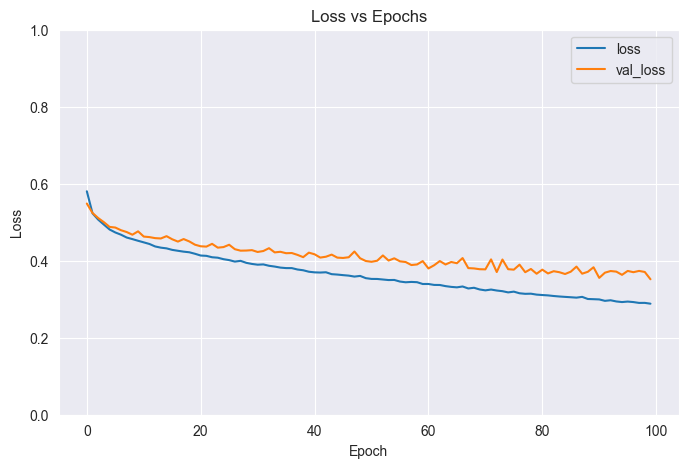

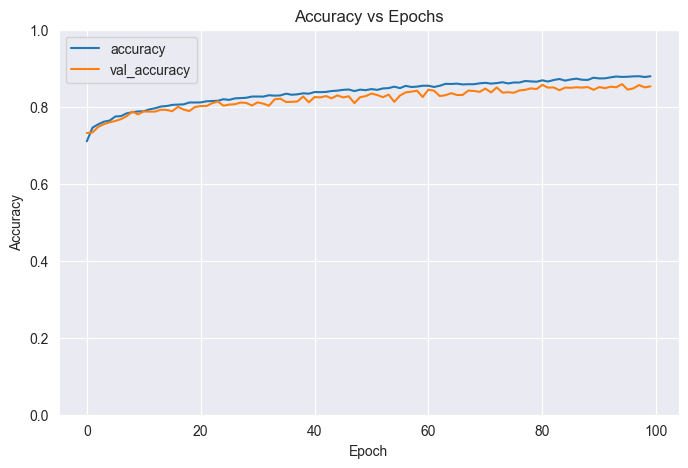

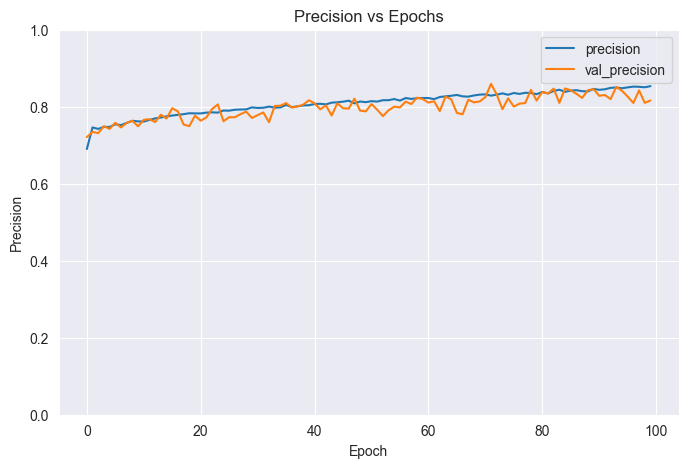

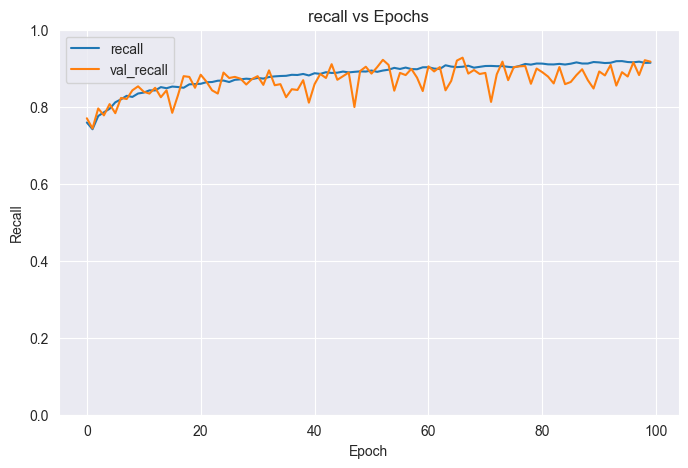

Accuracy: 0.8529693484306335
Precision: 0.8162751793861389
Recall: 0.9170593619346619
f1 score:  0.8637372386297013


In [18]:
pipelineForNN(WineDF)

# 7. Conclusion

## Initially, sampling out bad wines would give around 70-80% accuracy, but it is not a good model as it is not able to predict good wines. However, when we balance the dataset by duplicating the good wine to be as much as bad wine, the evaluation metrics all spike up to 80%-90%. Hence this is a better way to balance the dataset. Additionally, Normalize the features to be in the range of 0 and 1, Having 3 hidden layers with 64, 32, 16 neurons respectively, having batch size of 32, epoch of 100 and using adam optimizer with binary crossentropy loss function, While the evaluation of Red Wine Prediction is almost the same, we are able to achieve more 80% accuracy, 80% precision, 80% recall, and 80% f1 score on Red, and Combined Wine Dataset. Therefore, these should be good models to predict good and bad wines